# 画像のパワースペクトルを表示するスクリプト

## Usage
input_imgを入力画像の名前に直し，実行する．

## 実行内容
- 画像をグレースケールで読み込み表示
- FFTして，パワースペクトルを表示
- FFTしたデータを逆変換して生成されたデータの実部を表示

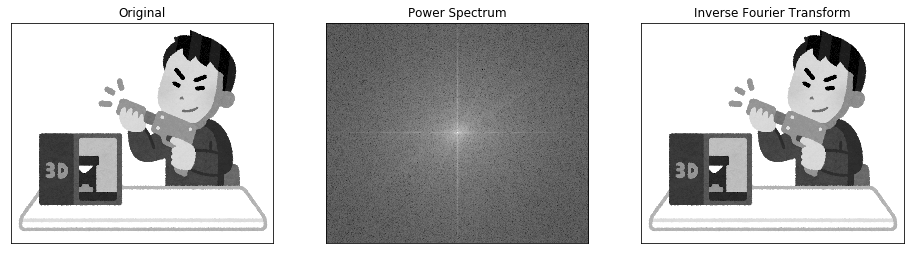

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.figure(figsize=(16,9))

# 入力画像
input_img = 'input.png'

# 画像をグレースケールで読み込み
img = cv2.imread(input_img,0)

# FFT
f = np.fft.fft2(img)

# スペクトル全体をずらして直流成分を中心にする
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

# ずらした分を戻す
f_ishift = np.fft.ifftshift(fshift)

# 逆変換
img_back = np.fft.ifft2(f_ishift)

# 元画像を表示
plt.subplot(131), plt.imshow(img, cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])

# パワースペクトル表示
plt.subplot(132), plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Power Spectrum'), plt.xticks([]), plt.yticks([])

# 逆変換して得られた画像を表示
plt.subplot(133), plt.imshow(img_back.real, cmap = 'gray')
plt.title('Inverse Fourier Transform'), plt.xticks([]), plt.yticks([])
plt.show()